In [1]:
import torch
import torchvision # 이미지 프로세싱이랑 직결된 모듈이다.
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import warnings # 에러를 제거하는 라이브러리
warnings.filterwarnings('ignore')

# CIFAR10 Datasets Loading 
딥러닝에서 로딩은 2단계 걸쳐서 할 것 이다.

### 1. First Load(Save) 

In [2]:
# root 는 경로를 설정해 torchvision에서 가져온 이미지가 저장될 경로를 설정해준다.
# train=True는 트레이닝할 데이터를 가져오겠다는 말이다.
# transform의 속성으로 ToTensor()의 함수를 적용하므로 원본에서 변형된 데이터셋을 가져온다.
# download True로 해줌과 동시에 다운로드가 시작된다.

''' ToTensor()로인해 변형된 데이터셋의 특성은 아래와 같다.
1. 스케일링 된 값으로 변경. (0~255 > 0~1)
2. Tensor값으로 변경해줌 (연산을 위해서)
3. 채널을 앞으로 보낸다. shape하면 앎
'''

train_dataset = torchvision.datasets.CIFAR10(root='../../down/', train=True, transform=transforms.ToTensor(), download=True)

Files already downloaded and verified


현재 필자는 데이터셋을 이미 받아놔서 "Files already downloaded and verified"라는 메세지가 나오는데 보통은 다운로드 바차트가 나온다.  
아래사진은 batch로 파일들이 분류되있는걸 볼 수 있는데. 이 것은아래에서 설명하겠다...

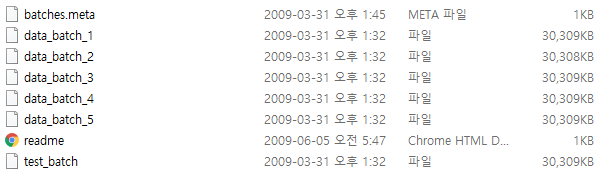

In [3]:
# 다운받은 데이터의 정보 출력.
print(train_dataset)

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ../../down/
    Split: Train
    StandardTransform
Transform: ToTensor()


In [4]:
# train_dataset의 첫번째 인덱스값에 있는 사진을 불러온다.
# 픽셀값이랑 라벨이나온다. 픽셀은 스케일링된 값이다.
print(train_dataset[0])

(tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
         [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
         [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
         ...,
         [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
         [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
         [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],

        [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
         [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
         [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
         ...,
         [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
         [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
         [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],

        [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
         [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
         [0.0824, 0.0000, 0.0314,  ..., 0.1961, 0.1961, 0

In [5]:
# 이미지와 라벨이 있으므로 따로 변수에 각각 저장한다.
image, label = train_dataset[0] 
print(image)
print(label)

tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
         [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
         [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
         ...,
         [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
         [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
         [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],

        [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
         [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
         [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
         ...,
         [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
         [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
         [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],

        [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
         [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
         [0.0824, 0.0000, 0.0314,  ..., 0.1961, 0.1961, 0.

In [6]:
# 채널이 앞에 있는것을 확인할 수 있다.
# 그러므로 채널을 뒤로 이동시켜주는 작업을 할 것이다.
# moveaxis()함수를 사용해서 채널을 이동 시켜준다.
print(image.shape)
print(image.size()) 

torch.Size([3, 32, 32])
torch.Size([3, 32, 32])


### 이미지 출력

In [7]:
image = image.numpy()

In [8]:
image

array([[[0.23137255, 0.16862746, 0.19607843, ..., 0.61960787,
         0.59607846, 0.5803922 ],
        [0.0627451 , 0.        , 0.07058824, ..., 0.48235294,
         0.46666667, 0.47843137],
        [0.09803922, 0.0627451 , 0.19215687, ..., 0.4627451 ,
         0.47058824, 0.42745098],
        ...,
        [0.8156863 , 0.7882353 , 0.7764706 , ..., 0.627451  ,
         0.21960784, 0.20784314],
        [0.7058824 , 0.6784314 , 0.7294118 , ..., 0.72156864,
         0.38039216, 0.3254902 ],
        [0.69411767, 0.65882355, 0.7019608 , ..., 0.84705883,
         0.5921569 , 0.48235294]],

       [[0.24313726, 0.18039216, 0.1882353 , ..., 0.5176471 ,
         0.49019608, 0.4862745 ],
        [0.07843138, 0.        , 0.03137255, ..., 0.34509805,
         0.3254902 , 0.34117648],
        [0.09411765, 0.02745098, 0.10588235, ..., 0.32941177,
         0.32941177, 0.28627452],
        ...,
        [0.6666667 , 0.6       , 0.6313726 , ..., 0.52156866,
         0.12156863, 0.13333334],
        [0.5

In [9]:
# 채널이 앞에 있어서 에러가 날것이다. 채널을 뒤로 이동 시켜주자.
# plt.imshow(image) 

In [10]:
# moveaxis() 함수는 axis을기준으로 해당 축의 값들을 이동시켜주는 함수이다. 
# 위와같이 채널이앞에있을때 뒤로 옮겨주기 좋은 함수이다.
# image = np.moveaxis(image, 0, 2) 이렇게 해도 마지막 인덱스가 2이므로 마지막으로 옮김
image = np.moveaxis(image, 0, -1) #  0의 자리에서 맨 마지막 자리인 2번째로 위치시켜줌,  -1은 맨 마지막을 말한다. -1또는 2를 쓰면됨.
print(image)

[[[0.23137255 0.24313726 0.24705882]
  [0.16862746 0.18039216 0.1764706 ]
  [0.19607843 0.1882353  0.16862746]
  ...
  [0.61960787 0.5176471  0.42352942]
  [0.59607846 0.49019608 0.4       ]
  [0.5803922  0.4862745  0.40392157]]

 [[0.0627451  0.07843138 0.07843138]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509805 0.21568628]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117648 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215687 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941177 0.19607843]
  [0.47058824 0.32941177 0.19607843]
  [0.42745098 0.28627452 0.16470589]]

 ...

 [[0.8156863  0.6666667  0.3764706 ]
  [0.7882353  0.6        0.13333334]
  [0.7764706  0.6313726  0.10196079]
  ...
  [0.627451   0.52156866 0.27450982]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333334 0.07843138]]

 [[0.7058824  0.54509807 0.3764706 ]
  [0.6784314  0.48235294 0.16470589]


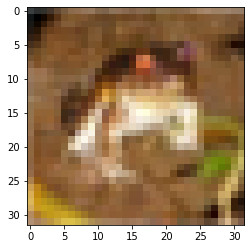

In [11]:
plt.imshow(image) # 저해상도.. 실제로 쓰느 이미지는 고해상도인데 작업하기어려워서 우선 저해상도의 데이터를 씀

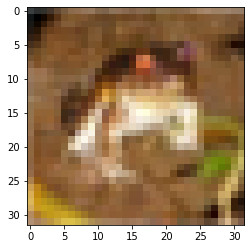

In [12]:
# transpose를 사용해 채널을 뒤로 옮겨서 출력한 이미지
plt.imshow(np.array(train_dataset[0][0]).transpose(1,2,0))

### Second Load

In [13]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=64,
                                          shuffle=True)

##### 모델링 밑 loss 값 등등 

In [14]:
cnt = 0
for images, labels in train_loader: # 781번? 782번? # 
    cnt+=1
    '''
    1. 실제로 모델정의 ... loss, optimizer설정
    2. 
    
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)
    
    # Forward Propagation
    # 2. 입력값을 넣어서 모델 돌린 결과로 예측값 출력 - pred = model(x)
    pred = model(inputs)
    
    # 3. Loss값 출력 - loss = loss_function(pred, targets)
    loss = loss_function(pred, targets) 
    
    # Back Propagation
    optimizer.zero_grad() # 항상 초기화 진행을 시켜야 한다.
    # 4. BackPropagation - loss.backward()
    # 편미분이 돌아감 Loss값에 따른 w,b값의 미분한값 아직 학습진행은 안됨. 
    loss.backward() # W = dL/dW, b = dL/db 편미분됨.
    # 5. 학습 진행 - optimizer.step()
    optimizer.step() # (편미분이 되었으므로, 그값을 저장시켜야 하니까) 학습을 시켜준다.
    
    
    if (epoch+1) % 5 == 0:
        print(f'Epoch : [{epoch+1}/{num_epochs}], Loss : {loss.item():.4f}')
        print('*'*30)
    
    '''

In [15]:
print(cnt)

782


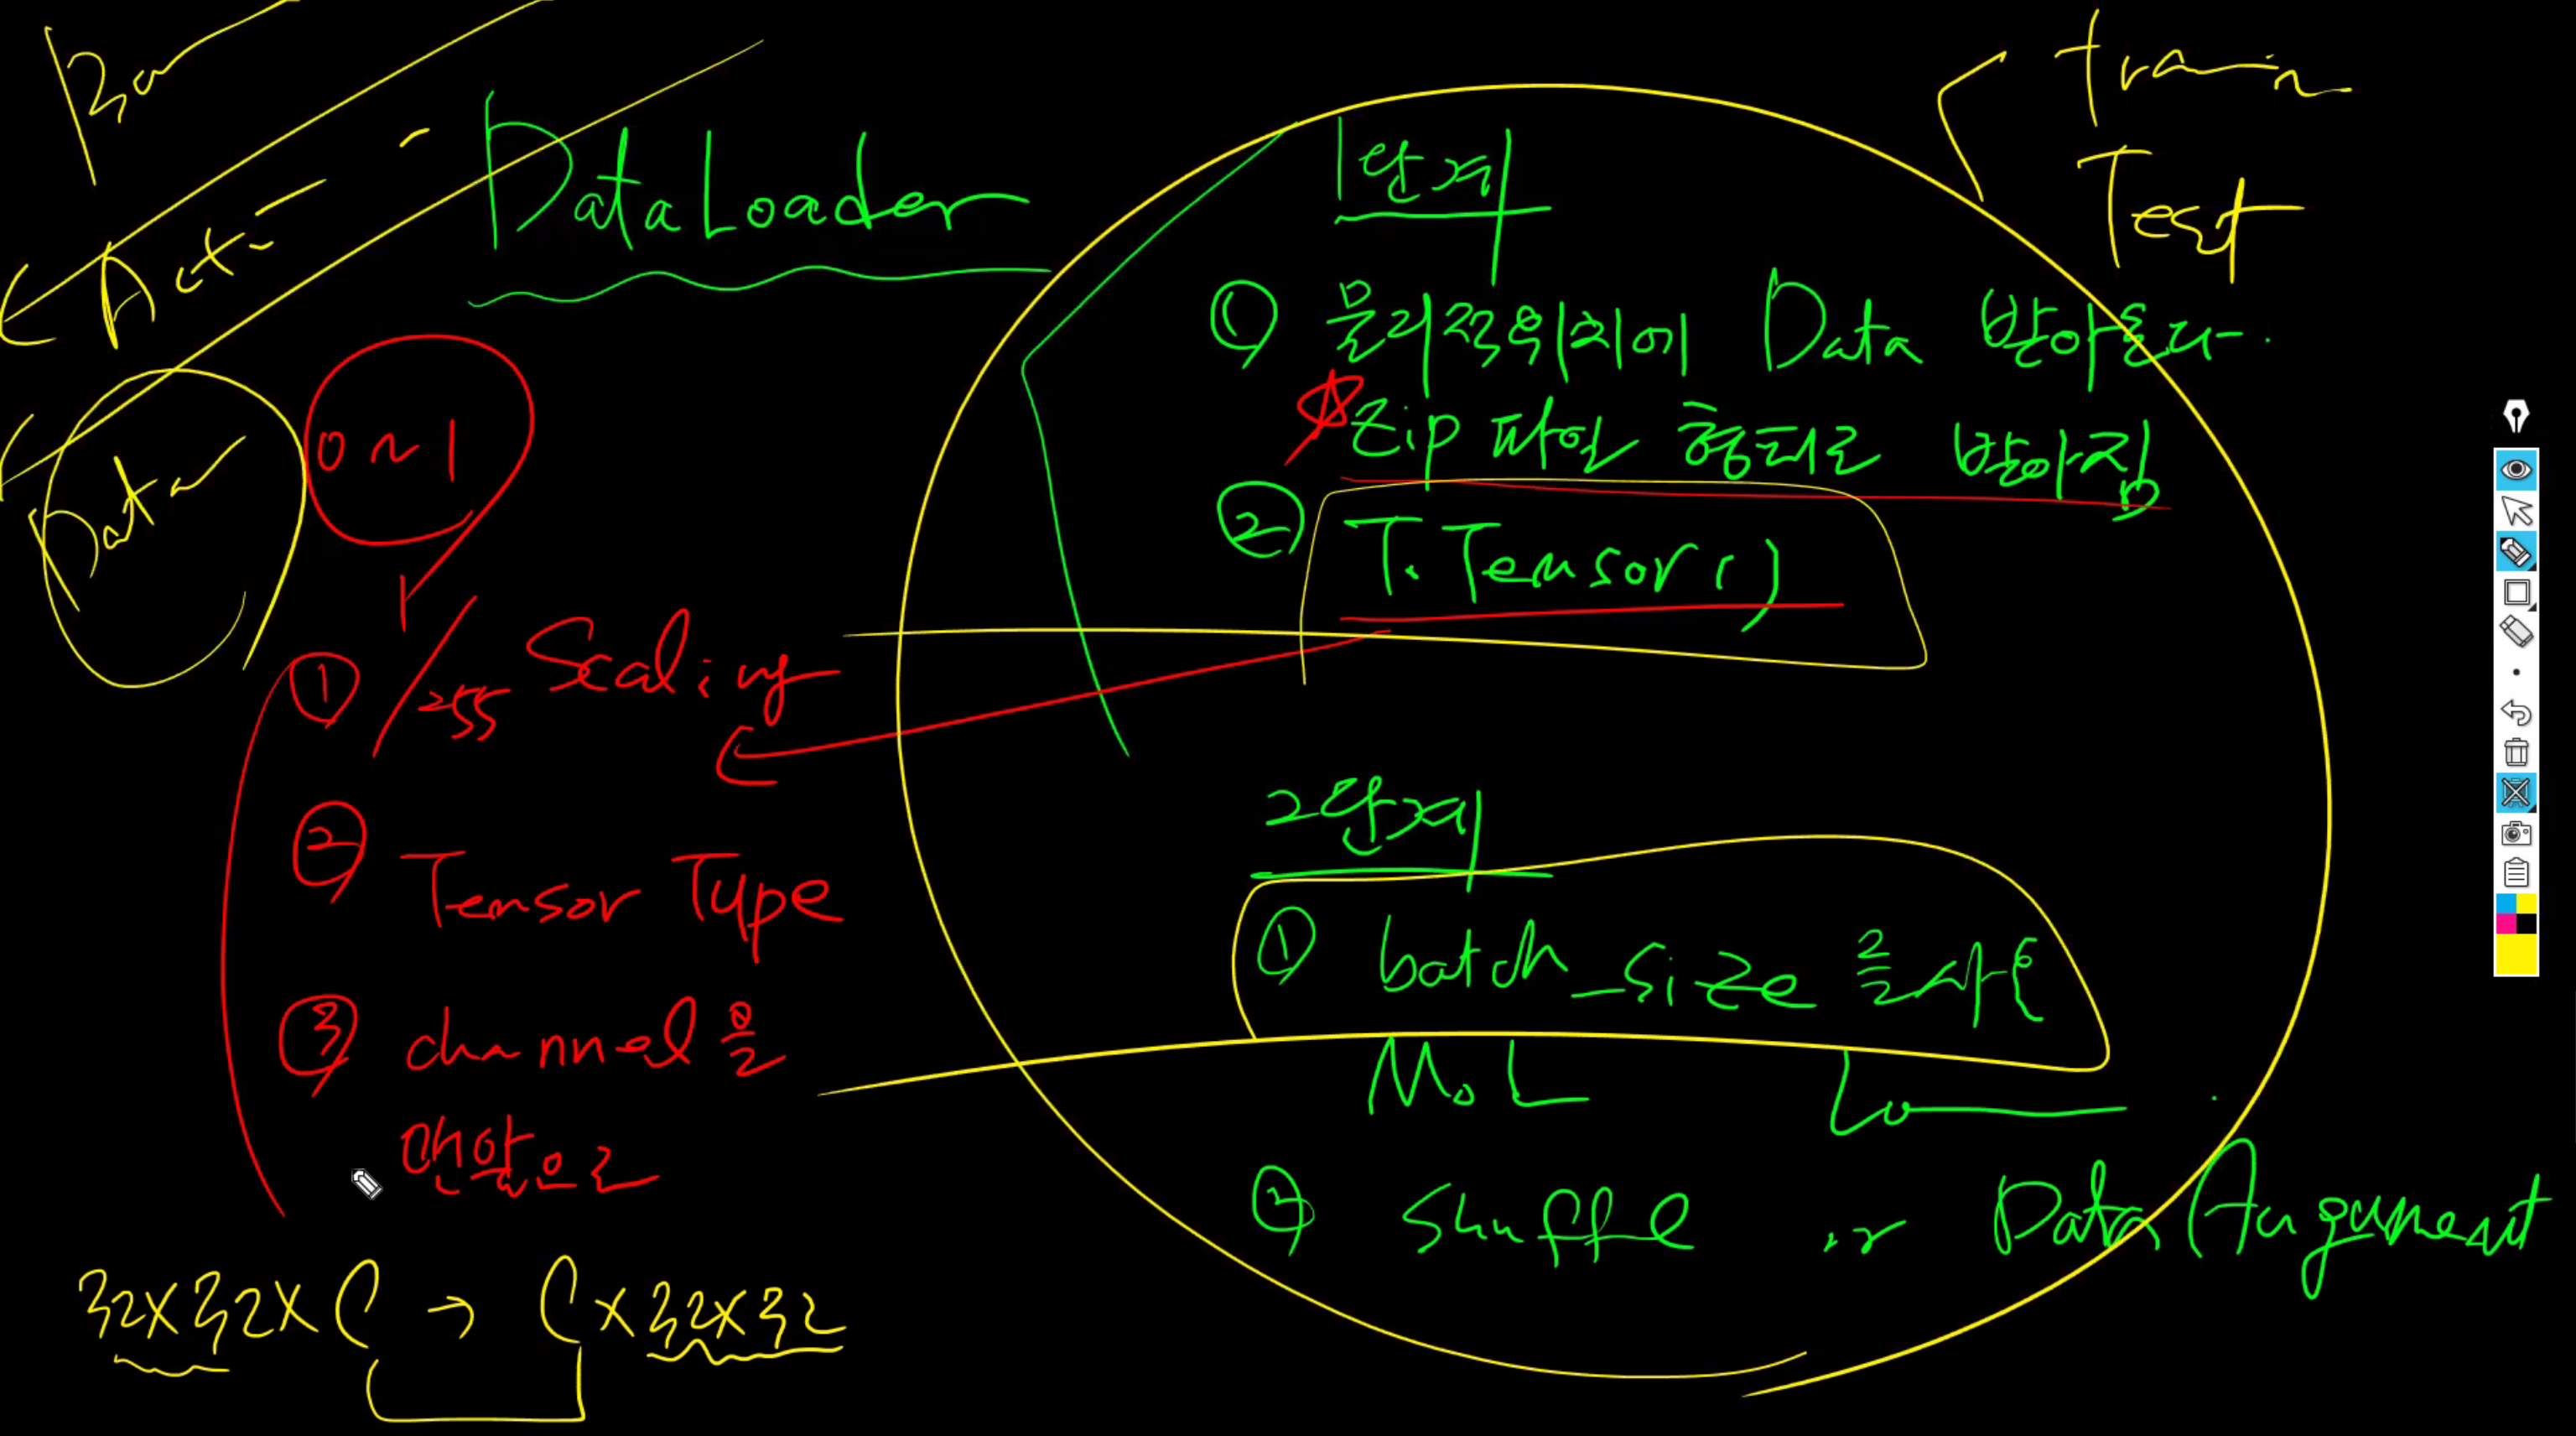

마지막으로 정리하자면,
* First Loading (Loading이라기 보다는 Saving에 가깝다.)
        train_dataset = torchvision.datasets.CIFAR10(root='../../down/', train=True, transform=transforms.ToTensor(), download=True)

* Second Loading
        train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=64,
                                          shuffle=True)